In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 9]


In [2]:
df = pd.read_pickle('data/prop_data_gap_12_4_2_1_ni.pkl').drop_duplicates()

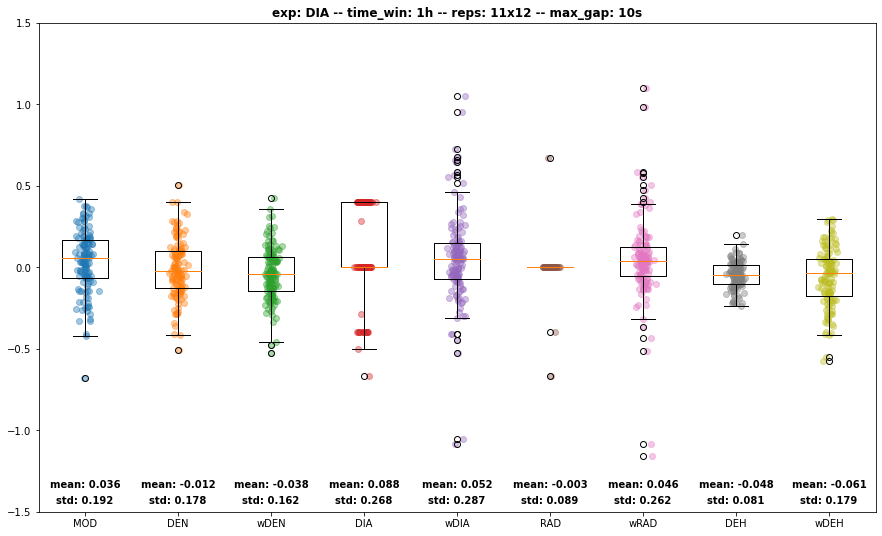

In [12]:
#===== RELATIVE DIFFERENCE =====

# --------- FILTERING ------------
reps_discarded = [20,41]

for exp in ['DIA']:
    time_win = 1 #h
    max_gap = 10 #s

    df_filt = df.loc[(df.time_win==3600 * time_win) & 
                     (df.max_gap==max_gap) & 
                    (df.exp.isin([exp+'a',exp+'b'])) & 
                    (~df.rep.isin(reps_discarded))]
    df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
    df_filt = df_filt.sort_values(['rep','h'])

    # ---- dataframe of relative difference---- 
    #p = df_filt.columns[9:]
    p = ['MOD', 'DEN', 'wDEN', 'DIA', 'wDIA', 'RAD', 'wRAD', 'DEH', 'wDEH']
    df_rd = (df_filt[p].diff()/df_filt[p].rolling(2).mean()).iloc[1::2]
    df_rd.insert(0,'rep', df_filt.rep.iloc[1::2])
    df_rd.insert(1,'exp', [a[0:3] for a in df_filt.exp.iloc[1::2]])
    df_rd.insert(3,'start-b', list(df_filt.start.iloc[1::2]))

    vals, names, xs = [],[],[]
    for i, col in enumerate(df_rd[p].columns):
        vals.append(df_rd[col].values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.04, df_rd[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
    plt.figure()
    box_plot = plt.boxplot(vals, labels=names)
    for x, val in zip(xs, vals):
        plt.scatter(x, val, alpha=0.4)

    means = df_rd[p].mean()
    stds =  df_rd[p].std()

    for xtick in range(len(p)):
        plt.text(xtick+1,-1.35, 'mean: {:.3f}'.format(means[xtick]), 
                  horizontalalignment='center',size='medium',color='k',weight='semibold')
        plt.text(xtick+1,-1.45, 'std: {:.3f}'.format(stds[xtick]), 
                      horizontalalignment='center',size='medium',color='k',weight='semibold')

    plt.ylim([-1.5,1.5])
    fig = plt.title('exp: ' + exp + 
                    ' -- time_win: ' + str(time_win) + 'h'
                    ' -- reps: ' + str(int(len(df_rd)*time_win/12)) + 'x' + str(int(12/time_win)) + 
                    ' -- max_gap: ' + str(max_gap) + 's',
                   fontweight="bold")

In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df_rd)

     rep  exp       MOD             start-b       DEN      wDEN       DIA  \
2047  16  DIA  0.332805 2021-09-13 09:00:00 -0.288721 -0.256664       0.4   
2048  16  DIA   0.35546 2021-09-13 10:00:00 -0.508577 -0.524589       0.4   
2049  16  DIA  0.324462 2021-09-13 11:00:00  -0.11015  0.006193       0.4   
2050  16  DIA  0.214071 2021-09-13 12:00:00 -0.160131  -0.20553       0.4   
2051  16  DIA -0.114721 2021-09-13 13:00:00  0.178554  0.159965       0.0   
2052  16  DIA  0.029979 2021-09-13 14:00:00  0.060764  0.038141       0.0   
2053  16  DIA -0.047232 2021-09-13 15:00:00  0.133654  0.188154       0.0   
2054  16  DIA -0.143895 2021-09-13 16:00:00  0.081738  0.076031       0.0   
2055  16  DIA -0.090416 2021-09-13 17:00:00  0.082246  0.104214       0.0   
2056  16  DIA -0.008507 2021-09-13 18:00:00 -0.026331 -0.087081      -0.4   
2057  16  DIA -0.286841 2021-09-13 19:00:00  0.339068   0.31666      -0.4   
2058  16  DIA -0.034312 2021-09-13 20:00:00  0.057322   0.09561      -0.4   

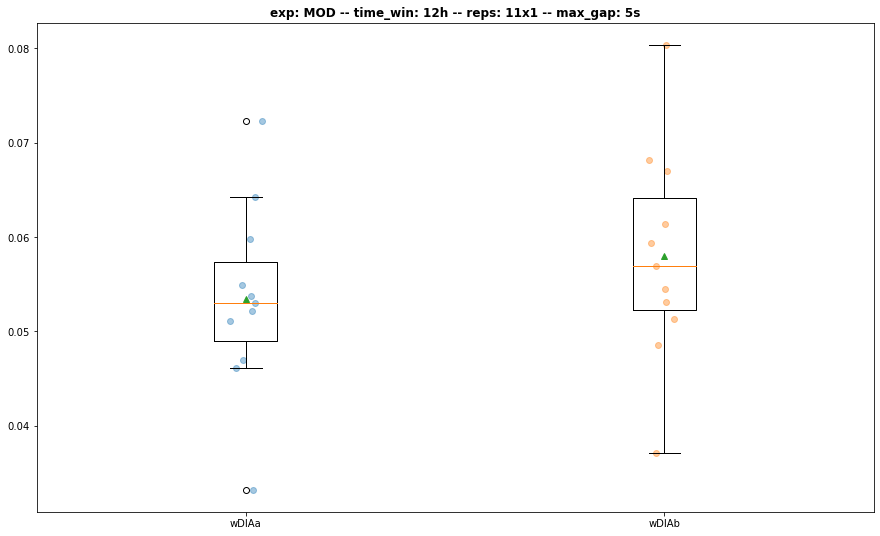

In [16]:
# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'MOD'
time_win = 12 #h
max_gap = 5 #s
p = 'wDIA'

df_filt = df.loc[(df.time_win==3600 * time_win) & 
                 (df.max_gap==max_gap) & 
                (df.exp.isin([exp+'a',exp+'b'])) & 
                (~df.rep.isin(reps_discarded))]
df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
df_filt = df_filt.sort_values(['rep','h'])



# dataframe for a-b comparison

df_ab = pd.DataFrame()
df_ab.insert(0, p + 'a', list(df_filt[p].iloc[::2]))
df_ab.insert(1, p + 'b', list(df_filt[p].iloc[1::2]))
df_ab

    
# Plotting
vals, names, xs = [],[],[]
for i, col in enumerate(df_ab.columns):
    vals.append(df_ab[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.02, df_ab[col].values.shape[0]))  # adds jitter to the data points - can be adjusted


    
box_plot = plt.boxplot(vals, labels=names, showmeans=True)
for x, val in zip(xs, vals):
    plt.scatter(x, val, alpha=0.4)

means = df_ab.mean()
stds =  df_ab.std()

        
#plt.ylim([0,.3])
fig = plt.title('exp: ' + exp + 
                ' -- time_win: ' + str(time_win) + 'h'
                ' -- reps: ' + str(int(len(df_ab)*time_win/12)) + 'x' + str(int(12/time_win)) + 
                ' -- max_gap: ' + str(max_gap) + 's',
               fontweight="bold")

plt.show()


In [17]:
# Stats

import statsmodels.api as sm

# --------- FILTERING ------------
reps_discarded = [20,41]
exp = 'MOD'
time_win = 4 #h
max_gap = 5 #s
p_list = ['MOD','wDIA','wDEN','wDEH']

df_filt = df.loc[(df.time_win==3600 * time_win) & 
                 (df.max_gap==max_gap) & 
                (df.exp.isin([exp+'a',exp+'b'])) & 
                (~df.rep.isin(reps_discarded))]
df_filt.insert(4,'h', [int(str(a)[-8:-6]) for a in df_filt.start])
df_filt = df_filt.sort_values(['rep','h'])



# dataframe for a-b comparison

df_ab = pd.DataFrame()
df_ab.insert(0, 'rep', list(df_filt['rep'].iloc[::2]))
df_ab.insert(1, 'date_exp', [str(a)[0:10] for a in df_filt['start'].iloc[::2]])
df_ab.insert(2,'h', [int(str(a)[-8:-6]) for a in df_filt['start'].iloc[::2]])
for p in p_list:
    df_ab.insert(3, p + 'a', list(df_filt[p].iloc[::2]))
    df_ab.insert(4, p + 'b', list(df_filt[p].iloc[1::2]))

    

df_ab.to_csv('NTM_df_stats.csv')
df_ab


/home/eg15396/miniconda3/envs/fort-env/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,rep,date_exp,h,wDEHa,wDEHb,wDENa,wDENb,wDIAa,wDIAb,MODa,MODb
0,14,2021-09-13,9,348.582902,370.561173,0.000375,0.000411,0.189536,0.191149,0.253098,0.221642
1,14,2021-09-13,13,392.214299,402.121205,0.000422,0.000453,0.178649,0.175115,0.253480,0.179948
2,14,2021-09-13,17,385.581325,464.774563,0.000462,0.000515,0.177738,0.156593,0.236980,0.167391
3,17,2021-10-01,9,434.863554,370.133388,0.000524,0.000478,0.150072,0.183510,0.241632,0.248448
4,17,2021-10-01,13,454.100464,417.919525,0.000518,0.000543,0.174175,0.164473,0.234217,0.227879
5,17,2021-10-01,17,485.818214,429.962981,0.000550,0.000561,0.173260,0.185965,0.214037,0.236131
6,22,2021-10-11,9,494.771051,453.905985,0.000561,0.000515,0.136033,0.150251,0.182480,0.226350
7,22,2021-10-11,13,463.554815,461.107433,0.000479,0.000520,0.143781,0.155806,0.244833,0.216646
8,22,2021-10-11,17,414.234993,464.791502,0.000461,0.000548,0.159071,0.162338,0.209365,0.193077
9,27,2021-10-17,9,586.284836,528.586930,0.000682,0.000636,0.130074,0.148810,0.188174,0.196875
